In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

% matplotlib inline

In [36]:
df = pd.read_csv('clean_titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Cabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,C85
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,C123
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,NaN


## Dummy Variables
- Sex
- Embarked
- Prefix
- Pclass

## Drop columns
- Cabin
- PassengerID
- Ticket

# Drop Columns

In [37]:
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [38]:
df.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


# Dummy variables

In [39]:
pd.get_dummies(df, columns=["Sex"]).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Prefix,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,Mr,0,1
1,1,1,38.0,1,0,71.2833,C,Mrs,1,0
2,1,3,26.0,0,0,7.9250,S,Miss,1,0
3,1,1,35.0,1,0,53.1000,S,Mrs,1,0
4,0,3,35.0,0,0,8.0500,S,Mr,0,1


In [40]:
df = pd.get_dummies(df, columns=["Sex"])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Prefix,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,Mr,0,1
1,1,1,38.0,1,0,71.2833,C,Mrs,1,0
2,1,3,26.0,0,0,7.9250,S,Miss,1,0
3,1,1,35.0,1,0,53.1000,S,Mrs,1,0
4,0,3,35.0,0,0,8.0500,S,Mr,0,1


In [41]:
df.drop(['Sex_female'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Prefix,Sex_male
0,0,3,22.0,1,0,7.2500,S,Mr,1
1,1,1,38.0,1,0,71.2833,C,Mrs,0
2,1,3,26.0,0,0,7.9250,S,Miss,0
3,1,1,35.0,1,0,53.1000,S,Mrs,0
4,0,3,35.0,0,0,8.0500,S,Mr,1


In [42]:
df = pd.get_dummies(df, columns=["Embarked","Pclass","Prefix"])
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,...,Prefix_ Master,Prefix_ Miss,Prefix_ Mlle,Prefix_ Mme,Prefix_ Mr,Prefix_ Mrs,Prefix_ Ms,Prefix_ Rev,Prefix_ Sir,Prefix_ the Countess
0,0,22.0,1,0,7.2500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
df.drop(['Embarked_C','Pclass_2','Prefix_ Master'], axis=1, inplace=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_1,Pclass_3,...,Prefix_ Major,Prefix_ Miss,Prefix_ Mlle,Prefix_ Mme,Prefix_ Mr,Prefix_ Mrs,Prefix_ Ms,Prefix_ Rev,Prefix_ Sir,Prefix_ the Countess
0,0,22.0,1,0,7.2500,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


# Train Test Split

In [44]:
Y = df.loc[:,['Survived']]
X = df.iloc[:,1:]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 39)

# Logistic Regression

In [46]:
logreg = LogisticRegression(solver='lbfgs') #initialize logreg
logreg.fit(x_train,y_train) #fit data into model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
train_acc = logreg.score(x_train,y_train) # Train accuracy
train_acc

0.8105939004815409

In [48]:
test_acc = logreg.score(x_test,y_test) # Test accuracy
test_acc

0.832089552238806

# Confusion matrix

In [49]:
predictions = logreg.predict(x_test)

In [50]:
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [51]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[158  18]
 [ 27  65]]


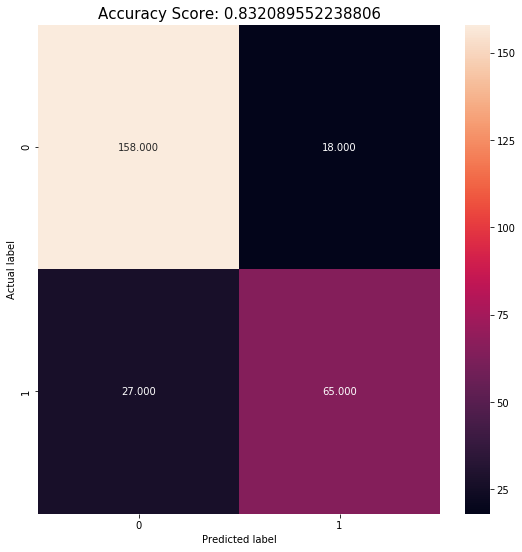

In [52]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(test_acc)
plt.title(all_sample_title, size = 15);

In [53]:
logreg.coef_

array([[-0.04467462, -0.48786868, -0.18988238,  0.00436899, -0.48390309,
        -0.40553123, -0.30598558,  0.84938958, -1.00015392, -0.16882933,
         0.        , -0.33534156, -0.57297121, -0.32602093,  0.16217744,
        -0.11130823,  0.38563247,  0.11405315,  0.        , -1.68309586,
         1.37782266,  0.16627397, -0.70541293,  0.22329417,  0.        ]])

In [54]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_3', 'Prefix_ Capt', 'Prefix_ Col', 'Prefix_ Don',
       'Prefix_ Dr', 'Prefix_ Jonkheer', 'Prefix_ Lady', 'Prefix_ Major',
       'Prefix_ Miss', 'Prefix_ Mlle', 'Prefix_ Mme', 'Prefix_ Mr',
       'Prefix_ Mrs', 'Prefix_ Ms', 'Prefix_ Rev', 'Prefix_ Sir',
       'Prefix_ the Countess'],
      dtype='object')

# Optional Task: Visualize above weights and talk about them

In [55]:
logreg.predict_proba(x_test)

array([[0.15968577, 0.84031423],
       [0.78099125, 0.21900875],
       [0.86197528, 0.13802472],
       [0.95095141, 0.04904859],
       [0.73440939, 0.26559061],
       [0.90551824, 0.09448176],
       [0.89644021, 0.10355979],
       [0.84820874, 0.15179126],
       [0.62855127, 0.37144873],
       [0.75991831, 0.24008169],
       [0.15134465, 0.84865535],
       [0.56220206, 0.43779794],
       [0.56880265, 0.43119735],
       [0.36147896, 0.63852104],
       [0.92186519, 0.07813481],
       [0.98162293, 0.01837707],
       [0.01809883, 0.98190117],
       [0.01156938, 0.98843062],
       [0.26120433, 0.73879567],
       [0.96006312, 0.03993688],
       [0.70765265, 0.29234735],
       [0.24690565, 0.75309435],
       [0.87831211, 0.12168789],
       [0.75287307, 0.24712693],
       [0.87810379, 0.12189621],
       [0.84621741, 0.15378259],
       [0.8680124 , 0.1319876 ],
       [0.57509057, 0.42490943],
       [0.94147888, 0.05852112],
       [0.01134868, 0.98865132],
       [0.

In [56]:
probs = logreg.predict_proba(x_test)[:,1]
probs

array([0.84031423, 0.21900875, 0.13802472, 0.04904859, 0.26559061,
       0.09448176, 0.10355979, 0.15179126, 0.37144873, 0.24008169,
       0.84865535, 0.43779794, 0.43119735, 0.63852104, 0.07813481,
       0.01837707, 0.98190117, 0.98843062, 0.73879567, 0.03993688,
       0.29234735, 0.75309435, 0.12168789, 0.24712693, 0.12189621,
       0.15378259, 0.1319876 , 0.42490943, 0.05852112, 0.98865132,
       0.16513422, 0.16663314, 0.04669276, 0.46736658, 0.25414139,
       0.30044731, 0.37925578, 0.127698  , 0.31002496, 0.09837376,
       0.27016443, 0.43548866, 0.14938418, 0.07815842, 0.10417522,
       0.05832415, 0.10008223, 0.80978417, 0.01467096, 0.137169  ,
       0.14811354, 0.6065054 , 0.21235444, 0.12737394, 0.13193756,
       0.13160226, 0.06543945, 0.08863425, 0.73620738, 0.87435034,
       0.1659265 , 0.44704816, 0.05849705, 0.17076873, 0.62369258,
       0.00194451, 0.20550031, 0.09731213, 0.2206649 , 0.02849198,
       0.58074976, 0.29471477, 0.58021778, 0.05387715, 0.66897

In [57]:
Threshold = 0.5
preds = np.where(probs > Threshold, 1, 0)
preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0])

In [59]:
df2 = pd.DataFrame({'Probabilities':probs,'Predicted':preds,'Actual':y_test['Survived']})
df2.head()

,Actual,Predicted,Probabilities
679,1,1,0.840314
6,0,0,0.219009
148,0,0,0.138025
197,0,0,0.049049
462,0,0,0.265591


In [60]:
df_tp = df2[(df2['Actual'] == 1) & (df2['Predicted'] == 1)].copy()
df_tp['Category'] = 'TP'
df_tn = df2[(df2['Actual'] == 0) & (df2['Predicted'] == 0)].copy()
df_tn['Category'] = 'TN'
df_fn = df2[(df2['Actual'] == 1) & (df2['Predicted'] == 0)].copy()
df_fn['Category'] = 'FN'
df_fp = df2[(df2['Actual'] == 0) & (df2['Predicted'] == 1)].copy()
df_fp['Category'] = 'FP'
df3 = pd.concat([df_tp, df_tn, df_fn, df_fp])
df3.head()

,Actual,Predicted,Probabilities,Category
679,1,1,0.840314,TP
651,1,1,0.848655,TP
289,1,1,0.638521,TP
307,1,1,0.981901,TP
258,1,1,0.988431,TP


In [61]:
df3['Category'].value_counts()

TN    158
TP     65
FN     27
FP     18
Name: Category, dtype: int64

In [63]:
df2[(df2['Actual'] == 1) & (df2['Predicted'] == 1)]

,Actual,Predicted,Probabilities
679,1,1,0.840314
651,1,1,0.848655
289,1,1,0.638521
307,1,1,0.981901
258,1,1,0.988431
831,1,1,0.753094
700,1,1,0.988651
777,1,1,0.809784
796,1,1,0.606505
133,1,1,0.874350


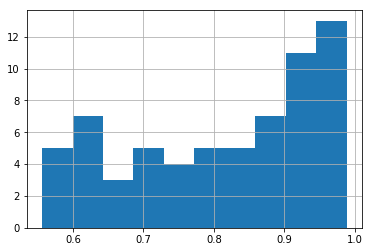

In [64]:
df3[df3['Category'] == 'TP']['Probabilities'].hist()

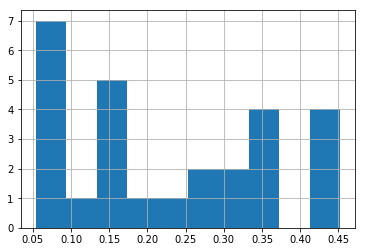

In [65]:
df3[df3['Category'] == 'FN']['Probabilities'].hist()

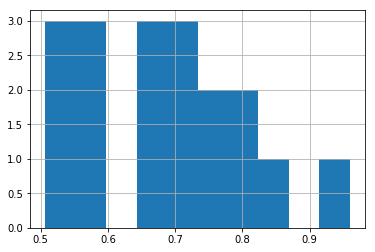

In [66]:
df3[df3['Category'] == 'FP']['Probabilities'].hist()

In [67]:
Threshold = 0.55
preds2 = np.where(probs > Threshold, 1, 0)
preds2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0])

In [68]:
accuracy_score(preds2, y_test['Survived'])

0.8432835820895522

# Optional Task: Do same as above for train set and look for any improvement in accuracy

In [69]:
fpr, tpr, thresholds = roc_curve(y_test['Survived'], probs, pos_label = 1)
roc_auc = auc(fpr, tpr)

Text(0,0.5,'True Positive Rate')

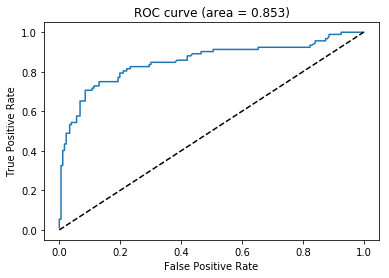

In [70]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--') 
plt.title('ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [71]:
df4 = pd.DataFrame({'Threshold':thresholds,'TPR':tpr,'FPR':fpr})
df4.head()

,FPR,TPR,Threshold
0,0.000000,0.010870,0.988651
1,0.000000,0.054348,0.971539
2,0.005682,0.054348,0.959773
3,0.005682,0.326087,0.868943
4,0.011364,0.326087,0.868084


In [72]:
df4

,FPR,TPR,Threshold
0,0.000000,0.010870,0.988651
1,0.000000,0.054348,0.971539
2,0.005682,0.054348,0.959773
3,0.005682,0.326087,0.868943
4,0.011364,0.326087,0.868084
5,0.011364,0.402174,0.809784
6,0.017045,0.402174,0.799626
7,0.017045,0.434783,0.783285
8,0.022727,0.434783,0.781717
9,0.022727,0.489130,0.745040


https://en.wikipedia.org/wiki/Feature_scaling standardization most important